In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("paper")
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

from tqdm import tqdm # progress bars :)
tqdm.pandas()

# Compare Nucleotide vs Protein K-mers

Also compare jaccard vs containment for evolpath comparisons?

In [3]:
ep = pd.read_csv("gtdb-rs202.evolpaths.all.csv.gz")
ep

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIm coverage threshold,EzAAIb AAI,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,0.5,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.926776,0.942109
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,0.5,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,0.5,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.927531,0.943375
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,0.5,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.689328,0.701284
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,0.5,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319405,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,10,200,0.002932,0.007312,...,0.5,0.541283,3045,2107,356,0.138199,0.3,0.3,0.587161,0.599336
319406,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,100,0.001910,0.004136,...,0.5,0.507907,3045,2723,369,0.127947,0.3,0.3,0.568680,0.573161
319407,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,200,0.001676,0.003613,...,0.5,0.507907,3045,2723,369,0.127947,0.3,0.3,0.561532,0.565705
319408,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,10,100,0.000573,0.001179,...,0.5,0.484488,3045,3603,283,0.085138,0.3,0.3,0.506599,0.508057


In [4]:
ep[(ep["path"]== "path1") & (ep["alpha-ksize"] == "protein-10") & (ep["scaled"] == 1)]

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIm coverage threshold,EzAAIb AAI,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani


In [5]:
# steps from common ancestor
steps_dict = {"genus": 1, "family": 2, "order": 3, "class": 4, "phylum": 5, "superkingdom":6}

In [6]:
ep.loc[:, "steps"] = ep["lowest_common_rank"].map(steps_dict)

In [7]:
ep[(ep["path"]== "path1") & (ep["alpha-ksize"] == "protein-10") & (ep["scaled"] == 1)]

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb AAI,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps


In [8]:
ep

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb AAI,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.926776,0.942109,1
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416,1
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.927531,0.943375,1
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.689328,0.701284,2
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319405,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,10,200,0.002932,0.007312,...,0.541283,3045,2107,356,0.138199,0.3,0.3,0.587161,0.599336,4
319406,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,100,0.001910,0.004136,...,0.507907,3045,2723,369,0.127947,0.3,0.3,0.568680,0.573161,5
319407,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,200,0.001676,0.003613,...,0.507907,3045,2723,369,0.127947,0.3,0.3,0.561532,0.565705,5
319408,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,10,100,0.000573,0.001179,...,0.484488,3045,3603,283,0.085138,0.3,0.3,0.506599,0.508057,6


In [9]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard_ani',
       'containA_ani', 'containAani_low', 'containAani_high', 'containBani',
       'containBani_low', 'containBani_high', 'mcANI', 'acANI', 'alpha-ksize',
       'compareM_mean_aai', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb_ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm_ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani_ident',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'EzAAIm AAI', 'EzAAIm anchor CDS count', 'EzAAIm compare CDS count',
       'EzAAIm matched CDS count', 'EzAAIm proteome coverage',
       'EzA

In [10]:
ep["avg_containment"] = (ep["anchor_containment"] + ep["compare_containment"])/2
ep

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps,avg_containment
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,1965,3590,1583,0.569937,0.3,0.3,0.926776,0.942109,1,0.301865
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416,1,0.310585
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,1965,3590,1583,0.569937,0.3,0.3,0.927531,0.943375,1,0.311575
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,1965,3596,1057,0.380147,0.3,0.3,0.689328,0.701284,2,0.000616
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246,2,0.001620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319405,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,10,200,0.002932,0.007312,...,3045,2107,356,0.138199,0.3,0.3,0.587161,0.599336,4,0.006091
319406,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,100,0.001910,0.004136,...,3045,2723,369,0.127947,0.3,0.3,0.568680,0.573161,5,0.003837
319407,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,200,0.001676,0.003613,...,3045,2723,369,0.127947,0.3,0.3,0.561532,0.565705,5,0.003365
319408,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,10,100,0.000573,0.001179,...,3045,3603,283,0.085138,0.3,0.3,0.506599,0.508057,6,0.001146


In [11]:
ep["alpha-ksize"].unique()

array(['nucleotide-21', 'nucleotide-31', 'nucleotide-51', 'protein-7',
       'protein-10'], dtype=object)

In [12]:
sns.color_palette("Blues", 9)

[(0.8917339484813533, 0.9351018838908112, 0.9753940792003075),
 (0.8141176470588235, 0.883921568627451, 0.9498039215686275),
 (0.7161860822760477, 0.8332026143790849, 0.916155324875048),
 (0.5796078431372549, 0.7701960784313725, 0.8737254901960784),
 (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373),
 (0.1791464821222607, 0.49287197231833907, 0.7354248366013072),
 (0.09019607843137256, 0.39294117647058824, 0.6705882352941177),
 (0.03137254901960784, 0.2897347174163783, 0.570319108035371)]

In [13]:
blues=sns.color_palette("Blues", 10)
blues_hex = blues.as_hex()[4:]

In [14]:
prot_order = ["protein-7", "protein-8", "protein-9", "protein-10", "protein-11"]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
alphak_order = nucl_order + prot_order
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]

alphak_colors = {}
#nucl_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582"}
nucl_colors =  {"nucleotide-21":"#f4a582","nucleotide-31":"#d6604d","nucleotide-51":"#b2182b"}


# greens
#protein_colors = {"protein-7": "#a1d99b", "protein-8": "#299617", "protein-9": "#74c476", "protein-10": "#31a354", "protein-11": "#006d2c"} 
# blues
protein_colors = dict(zip(prot_order, blues_hex))
#protein_colors = dict(zip(prot_order, blues_hex[::-1]))



alphak_colors.update(nucl_colors)
alphak_colors.update(protein_colors)

In [15]:
# are zeroes an issue?
print(len(ep[ep["jaccard"] == 0]))

104670


In [16]:
# how many 100% jaccard do we have?
print(len(ep[ep["jaccard"] == 1]))

0


In [17]:
# how many 100% max_containment do we have?
print(len(ep[ep["max_containment"] == 1]))

0


In [18]:
# replace zeroes with np.nan
cols = ["jaccard", "anchor_containment", "compare_containment", "max_containment", "avg_containment"]
ep[cols] = ep[cols].replace({0:np.nan})

In [19]:
print(len(ep[ep["jaccard"] == 0]))

0


In [20]:
print(len(ep[ep["avg_containment"] == 0]))

0


In [21]:
# start with scaled 1
sc1 = ep[ep['scaled']== 1]
sc1.head()

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps,avg_containment
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,1965,3590,1583,0.569937,0.3,0.3,0.926776,0.942109,1,0.301865
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,1965,3596,1057,0.380147,0.3,0.3,0.689328,0.701284,2,0.000616
6,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,nucleotide,21,1,0.000094,0.000321,...,1965,3935,482,0.163390,0.3,0.3,0.653969,0.667866,3,0.000227
9,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,nucleotide,21,1,0.000067,0.000237,...,1965,4533,424,0.130502,0.3,0.3,0.642905,0.657457,4,0.000165
12,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,nucleotide,21,1,0.000008,0.000022,...,1965,3124,183,0.071920,0.3,0.3,0.585573,0.593116,5,0.000018


In [22]:
sc1.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard_ani',
       'containA_ani', 'containAani_low', 'containAani_high', 'containBani',
       'containBani_low', 'containBani_high', 'mcANI', 'acANI', 'alpha-ksize',
       'compareM_mean_aai', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb_ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm_ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani_ident',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'EzAAIm AAI', 'EzAAIm anchor CDS count', 'EzAAIm compare CDS count',
       'EzAAIm matched CDS count', 'EzAAIm proteome coverage',
       'EzA

In [23]:
# simplify df a bit to make this faster
cols_to_drop = ['jaccard_ani',
       #'jani_low', 'jani_high', 
       'containA_ani', 'containAani_low',
       'containAani_high', 'containBani', 'containBani_low',
       'containBani_high', 'mcANI', 
        #'mcANI_low', 'mcANI_high',
       'compareM_mean_aai', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb_ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm_ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani_ident',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'min_containment_ani', 'avg_containment_ani']

sc1.drop(columns=cols_to_drop, inplace=True)

/Users/tessa/opt/miniconda3/envs/2021-rank-compare-nb/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


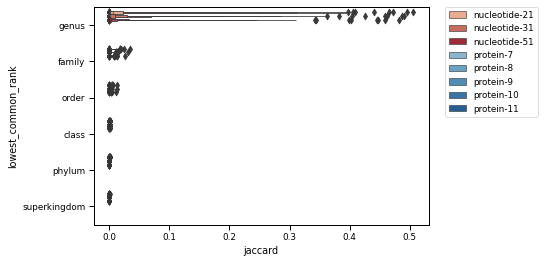

In [24]:
#plot jaccard across evolpaths
g=sns.boxenplot(data=sc1, x="jaccard", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, hue_order=alphak_order, order=rankorder)
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#fig = g.get_figure()
#fig.savefig("gtdb-rs202.evolpaths.jaccard.boxenplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig("gtdb-rs202.evolpaths.jaccard.boxenplot.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [25]:
sc1['alpha-ksize'].unique()

array(['nucleotide-21', 'nucleotide-31', 'nucleotide-51'], dtype=object)

In [26]:
select_ak = ['nucleotide-21', 'nucleotide-31', 'nucleotide-51', 'protein-7', 'protein-10']

In [27]:
sc1_k710 = sc1[sc1["alpha-ksize"].isin(select_ak)]

Text(0.5, 0, 'Jaccard')

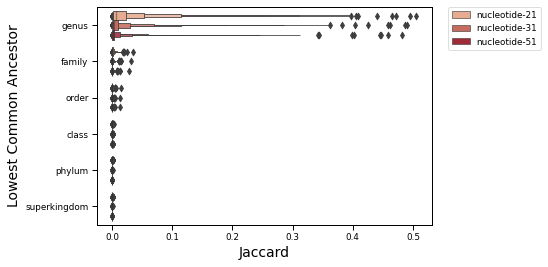

In [28]:
g=sns.boxenplot(data=sc1_k710, x="jaccard", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder) #hue_order=select_alphak_order,
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Lowest Common Ancestor", size=14)
plt.xlabel("Jaccard", size=14)

Text(0, 0.5, 'Jaccard')

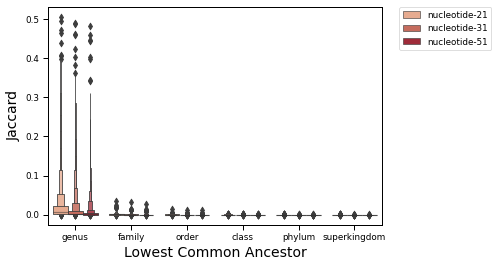

In [29]:
g=sns.boxenplot(data=sc1_k710, x="lowest_common_rank", y="jaccard", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder) #hue_order=select_alphak_order,
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Lowest Common Ancestor", size=14)
plt.ylabel("Jaccard", size=14)

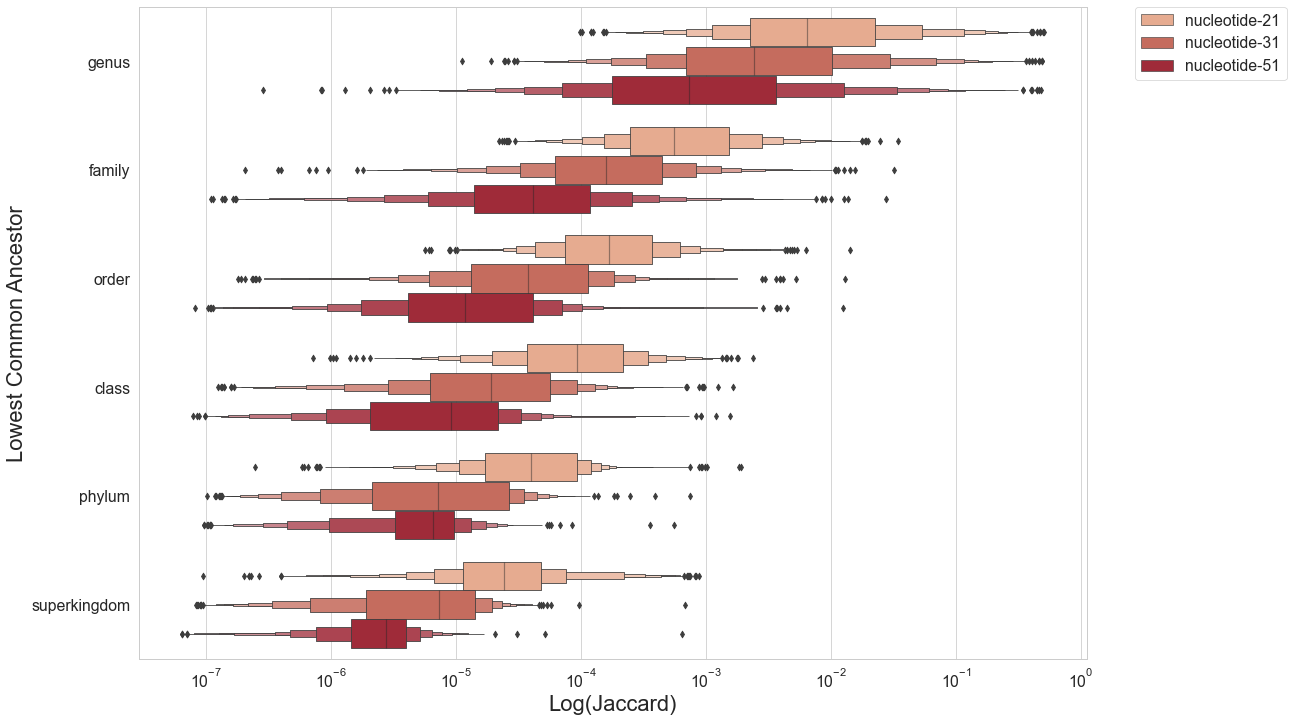

In [30]:
#plot jaccard across evolpaths -- log scale
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.8,rc={"font.size":22,"axes.titlesize":22,"axes.labelsize":15}):
    sns.set_style("whitegrid")
    g=sns.boxenplot(data=sc1_k710, x="jaccard", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder)
    g.set(xscale="log")
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(17, 12)
    plt.ylabel("Lowest Common Ancestor", size=22)
    plt.xlabel("Log(Jaccard)", size=22)

    fig = g.get_figure()
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.scaled1.jaccard.logscale.boxenplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.scaled1.jaccard.logscale.boxenplot.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

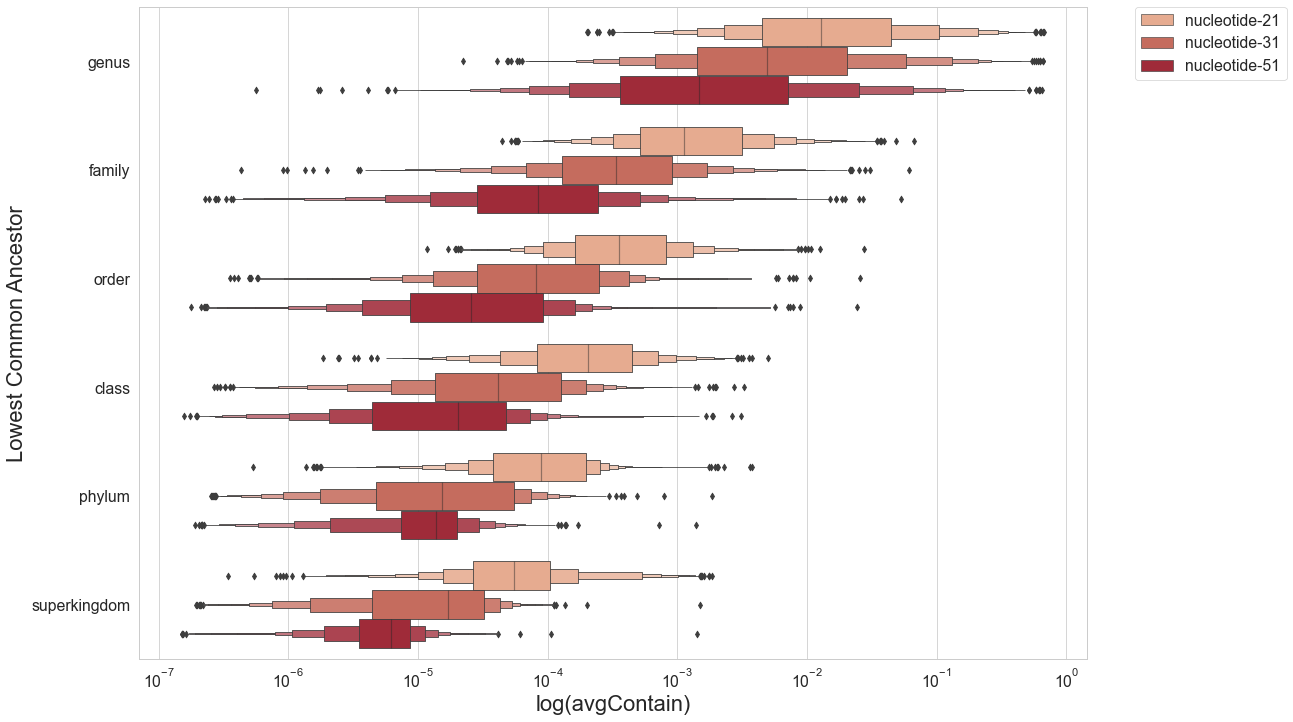

In [31]:
#plot jaccard across evolpaths -- log scale
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.8,rc={"font.size":22,"axes.titlesize":22,"axes.labelsize":15}):
    sns.set_style("whitegrid")
    g=sns.boxenplot(data=sc1_k710, x="avg_containment", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder)
    g.set(xscale="log")
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(17, 12)
    plt.ylabel("Lowest Common Ancestor", size=22)
    plt.xlabel("log(avgContain)", size=22)

    fig = g.get_figure()
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.scaled1.avgContain.logscale.boxenplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.scaled1.avgContain.logscale.boxenplot.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [32]:
# select standard scaled vals

default_scaled_nucl = ep[(ep["alphabet"] == "nucleotide") & (ep['scaled']== 1000)]
default_scaled_prot = ep[(ep["alphabet"] == "protein") & (ep['scaled']== 200)]


In [33]:
default_scaled_nucl

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps,avg_containment
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416,1,0.310585
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246,2,0.001620
7,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,nucleotide,21,1000,NaN,NaN,...,1965,3935,482,0.163390,0.3,0.3,NaN,NaN,3,NaN
10,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,nucleotide,21,1000,NaN,NaN,...,1965,4533,424,0.130502,0.3,0.3,NaN,NaN,4,NaN
13,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,nucleotide,21,1000,NaN,NaN,...,1965,3124,183,0.071920,0.3,0.3,NaN,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319372,GCA_002409405.1_x_GCA_001899145.1,GCA_002409405.1,GCA_001899145.1,path999,family,nucleotide,51,1000,0.000148,0.000305,...,3045,3137,1547,0.500485,0.3,0.3,0.852269,0.852735,2,0.000296
319375,GCA_002409405.1_x_GCA_013042625.1,GCA_002409405.1,GCA_013042625.1,path999,order,nucleotide,51,1000,NaN,NaN,...,3045,2761,702,0.241819,0.3,0.3,NaN,NaN,3,NaN
319378,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,nucleotide,51,1000,NaN,NaN,...,3045,2107,356,0.138199,0.3,0.3,NaN,NaN,4,NaN
319381,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,nucleotide,51,1000,NaN,NaN,...,3045,2723,369,0.127947,0.3,0.3,NaN,NaN,5,NaN


In [34]:
default_scaled_prot

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps,avg_containment
55,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,200,0.256108,0.608974,...,1965,3590,1583,0.569937,0.3,0.3,0.844570,0.888084,1,0.457744
57,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,200,0.027002,0.081731,...,1965,3596,1057,0.380147,0.3,0.3,0.628554,0.663897,2,0.060246
59,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,protein,7,200,0.006650,0.022837,...,1965,3935,482,0.163390,0.3,0.3,0.512570,0.547684,3,0.016066
61,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,protein,7,200,0.006931,0.024840,...,1965,4533,424,0.130502,0.3,0.3,0.514339,0.552090,4,0.017181
63,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,protein,7,200,0.003355,0.009215,...,1965,3124,183,0.071920,0.3,0.3,0.472382,0.492157,5,0.007232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319401,GCA_002409405.1_x_GCA_001899145.1,GCA_002409405.1,GCA_001899145.1,path999,family,protein,10,200,0.023628,0.046553,...,3045,3137,1547,0.500485,0.3,0.3,0.734632,0.735246,2,0.046168
319403,GCA_002409405.1_x_GCA_013042625.1,GCA_002409405.1,GCA_013042625.1,path999,order,protein,10,200,0.005211,0.011631,...,3045,2761,702,0.241819,0.3,0.3,0.626739,0.633650,3,0.010491
319405,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,10,200,0.002932,0.007312,...,3045,2107,356,0.138199,0.3,0.3,0.587161,0.599336,4,0.006091
319407,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,200,0.001676,0.003613,...,3045,2723,369,0.127947,0.3,0.3,0.561532,0.565705,5,0.003365


In [35]:
default_scaled = pd.concat([default_scaled_nucl,default_scaled_prot])
default_scaled

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps,avg_containment
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416,1,0.310585
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246,2,0.001620
7,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,nucleotide,21,1000,NaN,NaN,...,1965,3935,482,0.163390,0.3,0.3,NaN,NaN,3,NaN
10,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,nucleotide,21,1000,NaN,NaN,...,1965,4533,424,0.130502,0.3,0.3,NaN,NaN,4,NaN
13,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,nucleotide,21,1000,NaN,NaN,...,1965,3124,183,0.071920,0.3,0.3,NaN,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319401,GCA_002409405.1_x_GCA_001899145.1,GCA_002409405.1,GCA_001899145.1,path999,family,protein,10,200,0.023628,0.046553,...,3045,3137,1547,0.500485,0.3,0.3,0.734632,0.735246,2,0.046168
319403,GCA_002409405.1_x_GCA_013042625.1,GCA_002409405.1,GCA_013042625.1,path999,order,protein,10,200,0.005211,0.011631,...,3045,2761,702,0.241819,0.3,0.3,0.626739,0.633650,3,0.010491
319405,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,10,200,0.002932,0.007312,...,3045,2107,356,0.138199,0.3,0.3,0.587161,0.599336,4,0.006091
319407,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,200,0.001676,0.003613,...,3045,2723,369,0.127947,0.3,0.3,0.561532,0.565705,5,0.003365


In [36]:
default_scaled_selectk = default_scaled[default_scaled["alpha-ksize"].isin(select_ak)]

Text(0, 0.5, 'Jaccard')

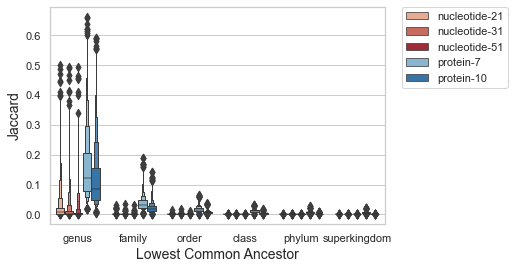

In [37]:
g=sns.boxenplot(data=default_scaled_selectk, x="lowest_common_rank", y="jaccard", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder) #hue_order=select_alphak_order,
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Lowest Common Ancestor", size=14)
plt.ylabel("Jaccard", size=14)

Text(0.5, 0, 'Jaccard')

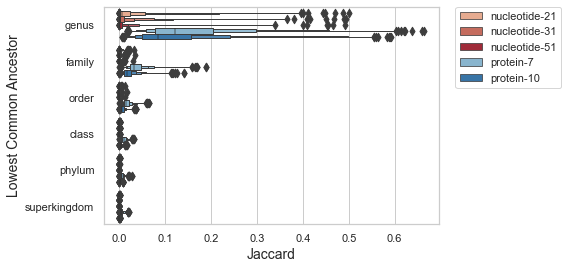

In [38]:
g=sns.boxenplot(data=default_scaled_selectk, y="lowest_common_rank", x="jaccard", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder) #hue_order=select_alphak_order,
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Lowest Common Ancestor", size=14)
plt.xlabel("Jaccard", size=14)

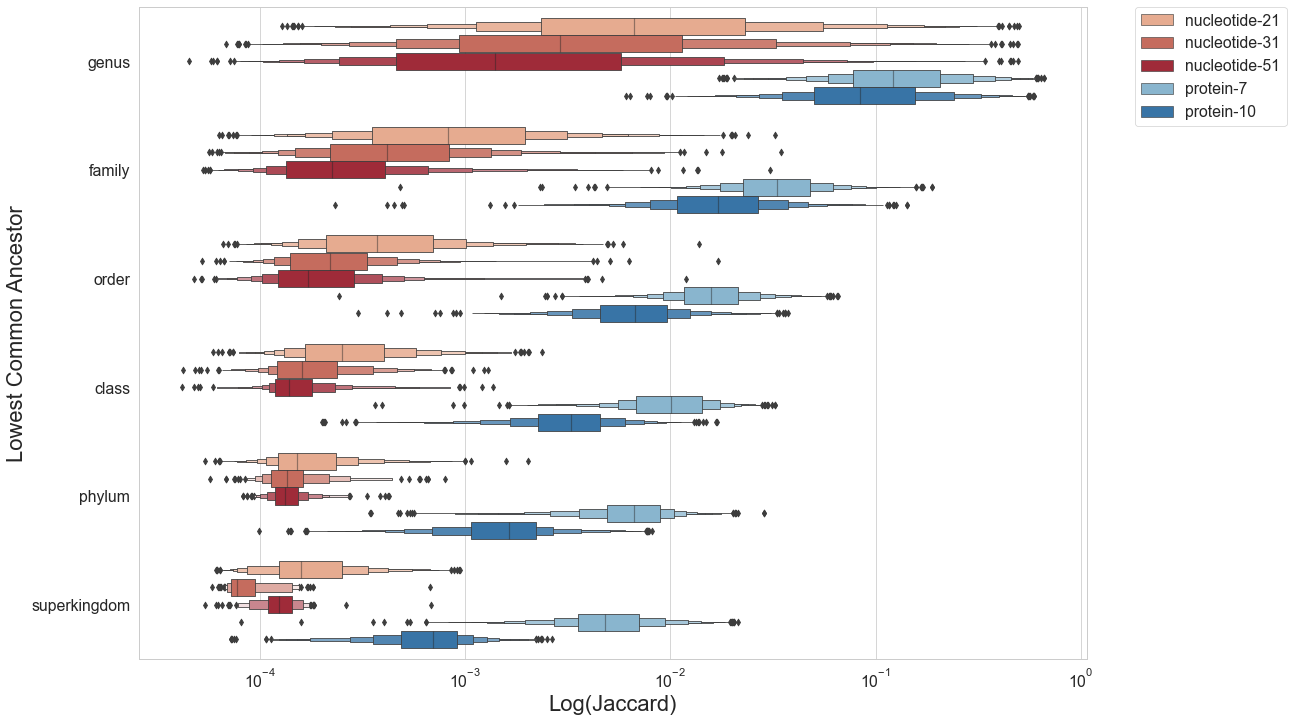

In [39]:
#plot jaccard across evolpaths -- log scale
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.8,rc={"font.size":22,"axes.titlesize":22,"axes.labelsize":15}):
    sns.set_style("whitegrid")
    g=sns.boxenplot(data=default_scaled_selectk, x="jaccard", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder)
    g.set(xscale="log")
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(17, 12)
    plt.ylabel("Lowest Common Ancestor", size=22)
    plt.xlabel("Log(Jaccard)", size=22)

    fig = g.get_figure()
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.jaccard.logscale.boxenplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.jaccard.logscale.boxenplot.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

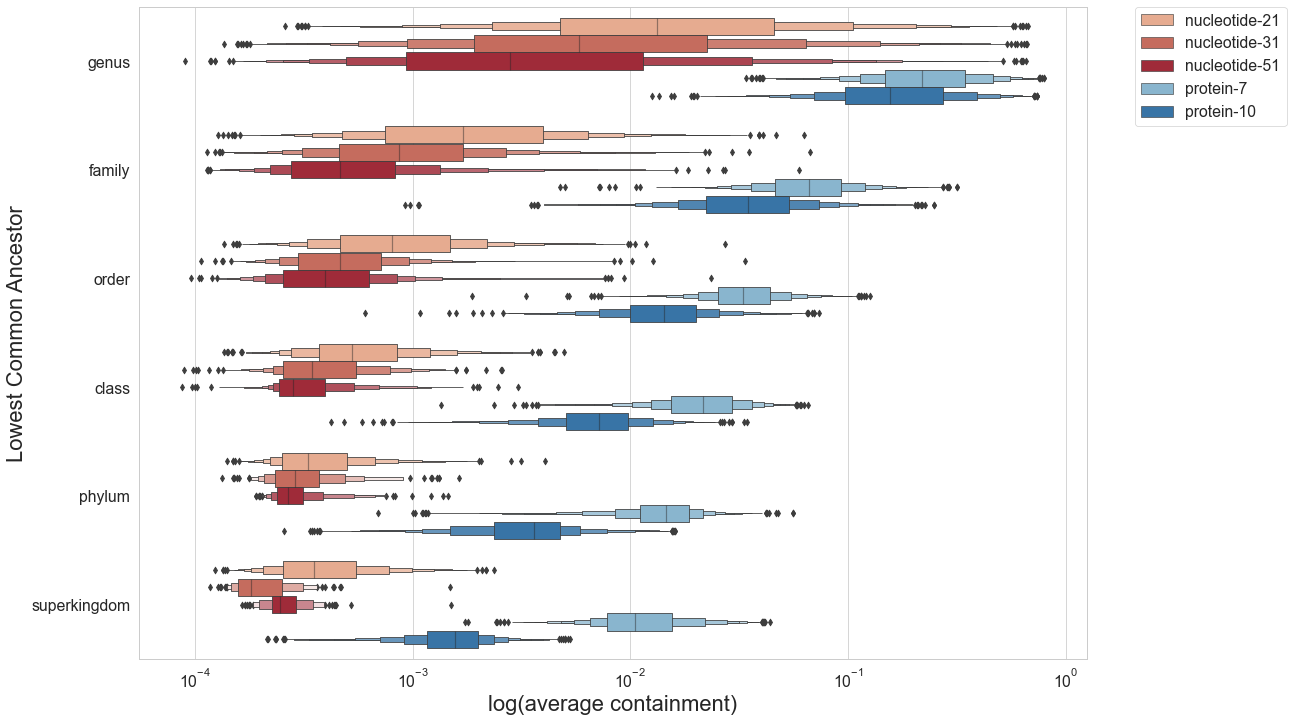

In [40]:
#plot avg containment across evolpaths -- log scale
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.8,rc={"font.size":22,"axes.titlesize":22,"axes.labelsize":15}):
    sns.set_style("whitegrid")
    g=sns.boxenplot(data=default_scaled_selectk, x="avg_containment", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder)
    g.set(xscale="log")
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(17, 12)
    plt.ylabel("Lowest Common Ancestor", size=22)
    plt.xlabel("log(average containment)", size=22)

    fig = g.get_figure()
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContain.logscale.boxenplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContain.logscale.boxenplot.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

Text(0.5, 0, 'Log(max containment)')

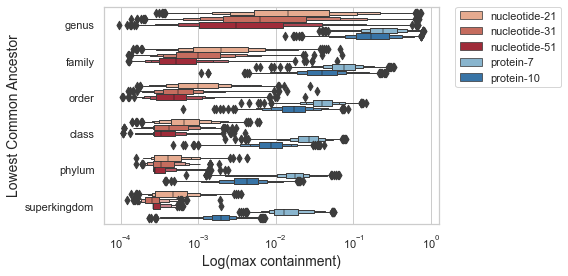

In [41]:
g=sns.boxenplot(data=default_scaled_selectk, x="max_containment", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder)
g.set(xscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Lowest Common Ancestor", size=14)
plt.xlabel("Log(max containment)", size=14)

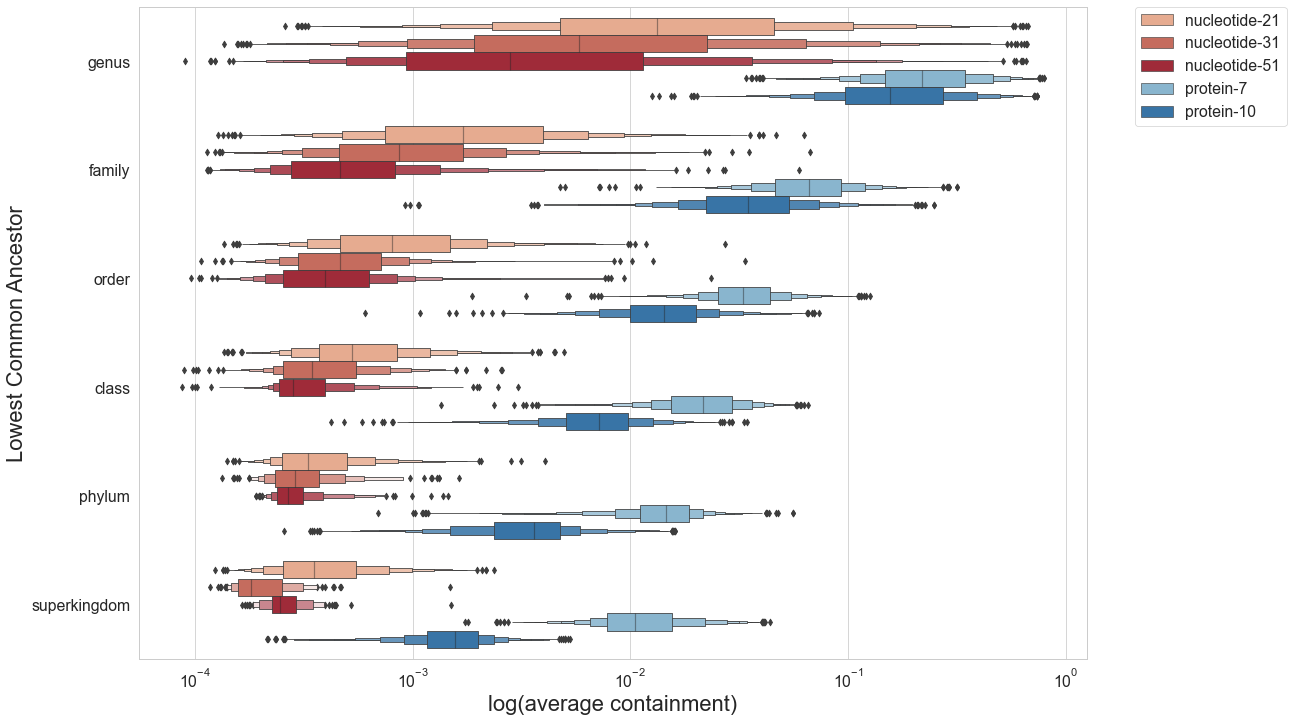

In [42]:
#plot avg containment across evolpaths -- log scale -- ridgeline plot
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.8,rc={"font.size":22,"axes.titlesize":22,"axes.labelsize":15}):
    sns.set_style("whitegrid")
    g=sns.boxenplot(data=default_scaled_selectk, x="avg_containment", y="lowest_common_rank", hue="alpha-ksize", 
                palette=alphak_colors, order=rankorder)
    g.set(xscale="log")
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(17, 12)
    plt.ylabel("Lowest Common Ancestor", size=22)
    plt.xlabel("log(average containment)", size=22)

    fig = g.get_figure()
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContain.logscale.boxenplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContain.logscale.boxenplot.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [43]:
default_scaled_selectk

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps,avg_containment
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416,1,0.310585
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246,2,0.001620
7,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,nucleotide,21,1000,NaN,NaN,...,1965,3935,482,0.163390,0.3,0.3,NaN,NaN,3,NaN
10,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,nucleotide,21,1000,NaN,NaN,...,1965,4533,424,0.130502,0.3,0.3,NaN,NaN,4,NaN
13,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,nucleotide,21,1000,NaN,NaN,...,1965,3124,183,0.071920,0.3,0.3,NaN,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319401,GCA_002409405.1_x_GCA_001899145.1,GCA_002409405.1,GCA_001899145.1,path999,family,protein,10,200,0.023628,0.046553,...,3045,3137,1547,0.500485,0.3,0.3,0.734632,0.735246,2,0.046168
319403,GCA_002409405.1_x_GCA_013042625.1,GCA_002409405.1,GCA_013042625.1,path999,order,protein,10,200,0.005211,0.011631,...,3045,2761,702,0.241819,0.3,0.3,0.626739,0.633650,3,0.010491
319405,GCA_002409405.1_x_GCA_002317435.1,GCA_002409405.1,GCA_002317435.1,path999,class,protein,10,200,0.002932,0.007312,...,3045,2107,356,0.138199,0.3,0.3,0.587161,0.599336,4,0.006091
319407,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,10,200,0.001676,0.003613,...,3045,2723,369,0.127947,0.3,0.3,0.561532,0.565705,5,0.003365


In [44]:
lca_ranks = default_scaled_selectk["lowest_common_rank"].unique()
lca_ranks

array(['genus', 'family', 'order', 'class', 'phylum', 'superkingdom'],
      dtype=object)

In [45]:
aksizes = default_scaled_selectk["alpha-ksize"].unique()
aksizes

array(['nucleotide-21', 'nucleotide-31', 'nucleotide-51', 'protein-7',
       'protein-10'], dtype=object)

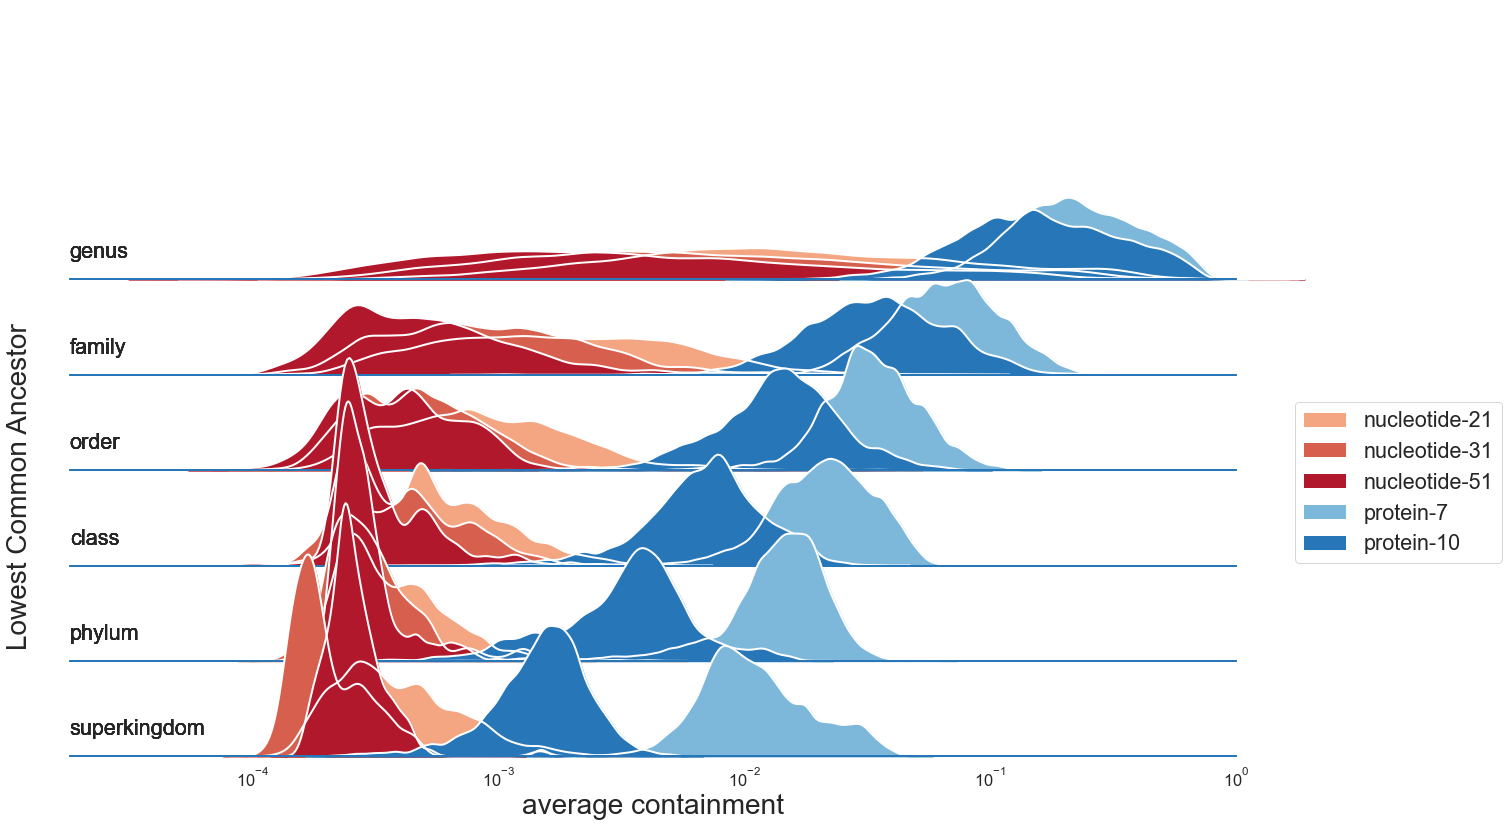

<Figure size 432x288 with 0 Axes>

In [46]:
def label(x, color, label):
        ax = plt.gca()
        lb = x.unique()[0]#.upper()
       # print(lb)
        ax.text(0, .1, lb, size="large",# fontweight="bold",# color=color,
                ha="left", va="center", transform=ax.transAxes)

#sns.set_theme(style="white")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.5)

#with sns.plotting_context("paper", font_scale=2,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15, "axes.facecolor": (0, 0, 0, 0)}):
#THIS PLOTTING CONTEXT screws things up for some reason.
g = sns.FacetGrid(default_scaled_selectk, row="lowest_common_rank", hue="alpha-ksize", aspect=15, height=1.2, palette=alphak_colors)
g.set(xscale="log")

g.map(sns.kdeplot, "avg_containment", bw_adjust=.6, cut=5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "avg_containment", bw_adjust=.6, cut=5, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
plt.gcf().set_size_inches(17, 12) 

    
g.map(label, "lowest_common_rank")
    # make overlapping
#plt.subplots_adjust(hspace=-.65)
g.fig.subplots_adjust(hspace=-.65)

    # remove axis details that don't work well with overlapping plots
g.set(yticks=[], xlabel="", ylabel="", xlim=(None, 1),ylim=(None, None), title="")# xlim=(None, 1), , fontsize =10)
g.despine(bottom=True, left=True)

# create a legend
handles=[]
for ak, color in alphak_colors.items():
    if ak in default_scaled_selectk["alpha-ksize"].unique():
        handles.append(mpatches.Patch(facecolor=color, label=ak))
lgd = plt.legend(handles=handles, bbox_to_anchor=(1.05, 1.3), loc=2, borderaxespad=0., facecolor="white", fontsize="large")
    
txt= g.fig.text(-0.02, 0.4, 'Lowest Common Ancestor', va='center', rotation='vertical', size=28)

plt.xlabel("average containment", size=28)
    #plt.ylabel("Lowest Common Ancestor", size=28)
plt.show()
plt.tight_layout()
g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContain.logscale.ridgeplot.pdf", bbox_extra_artists=(lgd,txt), bbox_inches='tight')
g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContain.logscale.ridgeplot.png", bbox_extra_artists=(lgd,txt), bbox_inches='tight')

In [47]:
default_scaled_selectk.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard_ani',
       'containA_ani', 'containAani_low', 'containAani_high', 'containBani',
       'containBani_low', 'containBani_high', 'mcANI', 'acANI', 'alpha-ksize',
       'compareM_mean_aai', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb_ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm_ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani_ident',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'EzAAIm AAI', 'EzAAIm anchor CDS count', 'EzAAIm compare CDS count',
       'EzAAIm matched CDS count', 'EzAAIm proteome coverage',
       'EzA

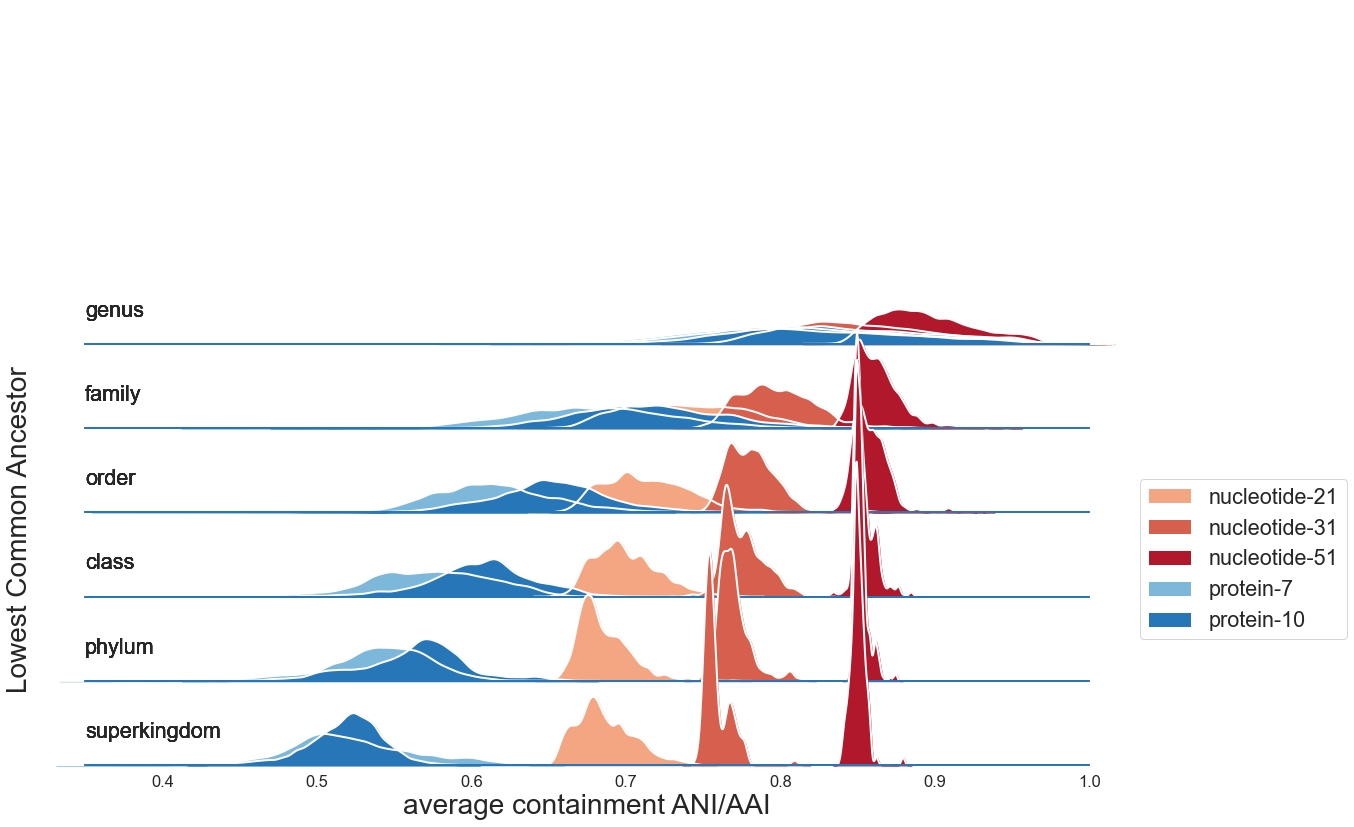

<Figure size 432x288 with 0 Axes>

In [48]:
def label(x, color, label):
        ax = plt.gca()
        lb = x.unique()[0]#.upper()
       # print(lb)
        ax.text(0, .1, lb, size="large",# fontweight="bold",# color=color,
                ha="left", va="center", transform=ax.transAxes)
#sns.set_theme(style="white",)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.5)

#with sns.plotting_context("paper", font_scale=2,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15, "axes.facecolor": (0, 0, 0, 0)}):
g = sns.FacetGrid(default_scaled_selectk, row="lowest_common_rank", hue="alpha-ksize", aspect=15, height=1.2, palette=alphak_colors)

g.map(sns.kdeplot, "avg_containment_ani", bw_adjust=.6, cut=5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "avg_containment_ani", bw_adjust=.6, cut=5, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
plt.gcf().set_size_inches(15, 12) 

    
g.map(label, "lowest_common_rank")
# make overlapping
g.fig.subplots_adjust(hspace=-.75)
# remove axis details that don't work well with overlapping plots
g.set(yticks=[], xlabel="", ylabel="", xlim=(0.35, 1), ylim=(None, None), title="")#, fontsize =10)
g.despine(bottom=True, left=True)

# create a legend
handles=[]
for ak, color in alphak_colors.items():
    if ak in default_scaled_selectk["alpha-ksize"].unique():
        handles.append(mpatches.Patch(facecolor=color, label=ak))
lgd = plt.legend(handles=handles, bbox_to_anchor=(1.05, .85), loc=2, borderaxespad=0., facecolor="white", fontsize="large")
txt= g.fig.text(-0.02, 0.35, 'Lowest Common Ancestor', va='center', rotation='vertical', size=28)
plt.xlabel("average containment ANI/AAI", size=28)
    #plt.ylabel("Lowest Common Ancestor", size=28)
plt.show()
plt.tight_layout()
g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContainANI.ridgeplot.pdf", bbox_extra_artists=(lgd,txt), bbox_inches='tight')
g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContainANI.ridgeplot.png", bbox_extra_artists=(lgd,txt), bbox_inches='tight')

# Plot AAI, no ANI ridgeplot

{'protein-7': '#399a8b', 'protein-10': '#2676b8'}

In [50]:
prot_only = default_scaled_selectk[default_scaled_selectk["alphabet"] == "protein"]
prot_only.head()

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps,avg_containment
55,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,200,0.256108,0.608974,...,1965,3590,1583,0.569937,0.3,0.3,0.844570,0.888084,1,0.457744
57,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,200,0.027002,0.081731,...,1965,3596,1057,0.380147,0.3,0.3,0.628554,0.663897,2,0.060246
59,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,protein,7,200,0.006650,0.022837,...,1965,3935,482,0.163390,0.3,0.3,0.512570,0.547684,3,0.016066
61,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,protein,7,200,0.006931,0.024840,...,1965,4533,424,0.130502,0.3,0.3,0.514339,0.552090,4,0.017181
63,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,protein,7,200,0.003355,0.009215,...,1965,3124,183,0.071920,0.3,0.3,0.472382,0.492157,5,0.007232


In [53]:
lblue = sns.color_palette("Paired").as_hex()[0]
dblue = sns.color_palette("Paired").as_hex()[1]
db2=sns.color_palette("Blues", 10).as_hex()[7]
lgreen = sns.color_palette("Paired").as_hex()[2]
dgreen = sns.color_palette("Paired").as_hex()[3]
dgr2 = sns.color_palette("Greens", 10)[7]
prot_ak = ["protein-7", "protein-10"]
p_colors = ["#399a8b", db2] #dgr2] #[dblue, dgr2]
protein_colors = dict(zip(prot_ak, p_colors))
protein_colors


{'protein-7': '#399a8b', 'protein-10': '#2676b8'}

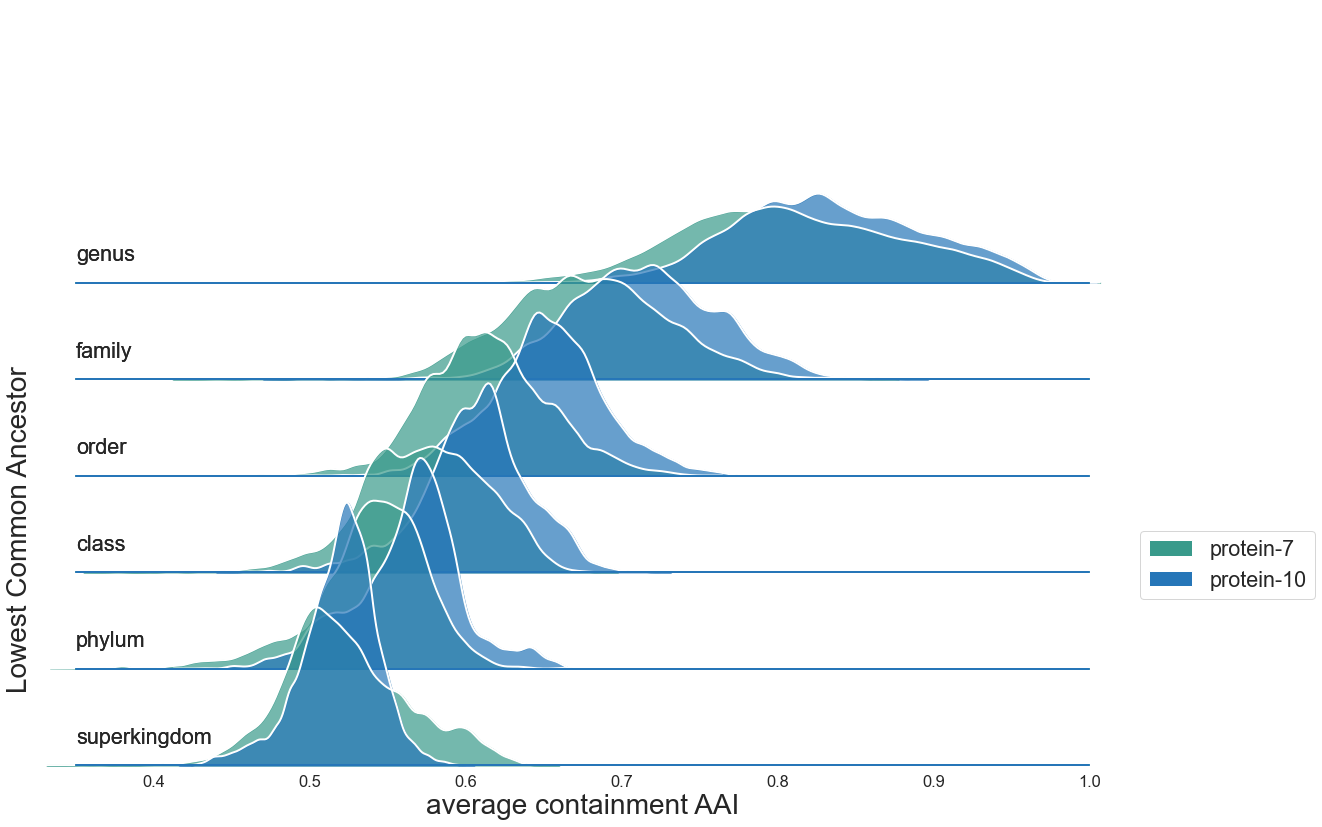

<Figure size 432x288 with 0 Axes>

In [62]:
def label(x, color, label):
        ax = plt.gca()
        lb = x.unique()[0]#.upper()
       # print(lb)
        ax.text(0, .1, lb, size="large",# fontweight="bold",# color=color,
                ha="left", va="center", transform=ax.transAxes)
#sns.set_theme(style="white",)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.5)

#with sns.plotting_context("paper", font_scale=2,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15, "axes.facecolor": (0, 0, 0, 0)}):
g = sns.FacetGrid(prot_only, row="lowest_common_rank", hue="alpha-ksize", aspect=15, height=1.2, palette=protein_colors)

g.map(sns.kdeplot, "avg_containment_ani", bw_adjust=.6, cut=5, clip_on=False, fill=True, alpha=0.7, linewidth=1.5)
g.map(sns.kdeplot, "avg_containment_ani", bw_adjust=.6, cut=5, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
plt.gcf().set_size_inches(15, 12) 

    
g.map(label, "lowest_common_rank")
# make overlapping
g.fig.subplots_adjust(hspace=-.65)
# remove axis details that don't work well with overlapping plots
g.set(yticks=[], xlabel="", ylabel="", xlim=(0.35, 1), ylim=(None, None), title="")#, fontsize =10)
g.despine(bottom=True, left=True)

# create a legend
handles=[]
for ak, color in protein_colors.items():
    if ak in prot_only["alpha-ksize"].unique():
        handles.append(mpatches.Patch(facecolor=color, label=ak))
lgd = plt.legend(handles=handles, bbox_to_anchor=(1.05, .85), loc=2, borderaxespad=0., facecolor="white", fontsize="large")
txt= g.fig.text(-0.02, 0.35, 'Lowest Common Ancestor', va='center', rotation='vertical', size=28)
plt.xlabel("average containment AAI", size=28)
    #plt.ylabel("Lowest Common Ancestor", size=28)
plt.show()
plt.tight_layout()
g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContainAAI.ridgeplot.pdf", bbox_extra_artists=(lgd,txt), bbox_inches='tight')
g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContainANI.ridgeplot.png", bbox_extra_artists=(lgd,txt), bbox_inches='tight')

# k10 only

In [63]:
p10 = prot_only[prot_only["ksize"] == 10]
p10.head()

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,min_containment_ani,avg_containment_ani,steps,avg_containment
67,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,10,200,0.214226,0.526337,...,1965,3590,1583,0.569937,0.3,0.3,0.875767,0.906801,1,0.395864
69,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,10,200,0.014410,0.046550,...,1965,3596,1057,0.380147,0.3,0.3,0.677732,0.706793,2,0.033497
71,GCA_004524385.1_x_GCF_008000775.1,GCA_004524385.1,GCF_008000775.1,path1,order,protein,10,200,0.001731,0.006125,...,1965,3935,482,0.163390,0.3,0.3,0.547200,0.573987,3,0.004266
73,GCA_004524385.1_x_GCA_013375405.1,GCA_004524385.1,GCA_013375405.1,path1,class,protein,10,200,0.001561,0.005717,...,1965,4533,424,0.130502,0.3,0.3,0.540872,0.568757,4,0.003930
75,GCA_004524385.1_x_GCA_004524565.1,GCA_004524385.1,GCA_004524565.1,path1,phylum,protein,10,200,0.000864,0.002450,...,1965,3124,183,0.071920,0.3,0.3,0.515758,0.531964,5,0.001891


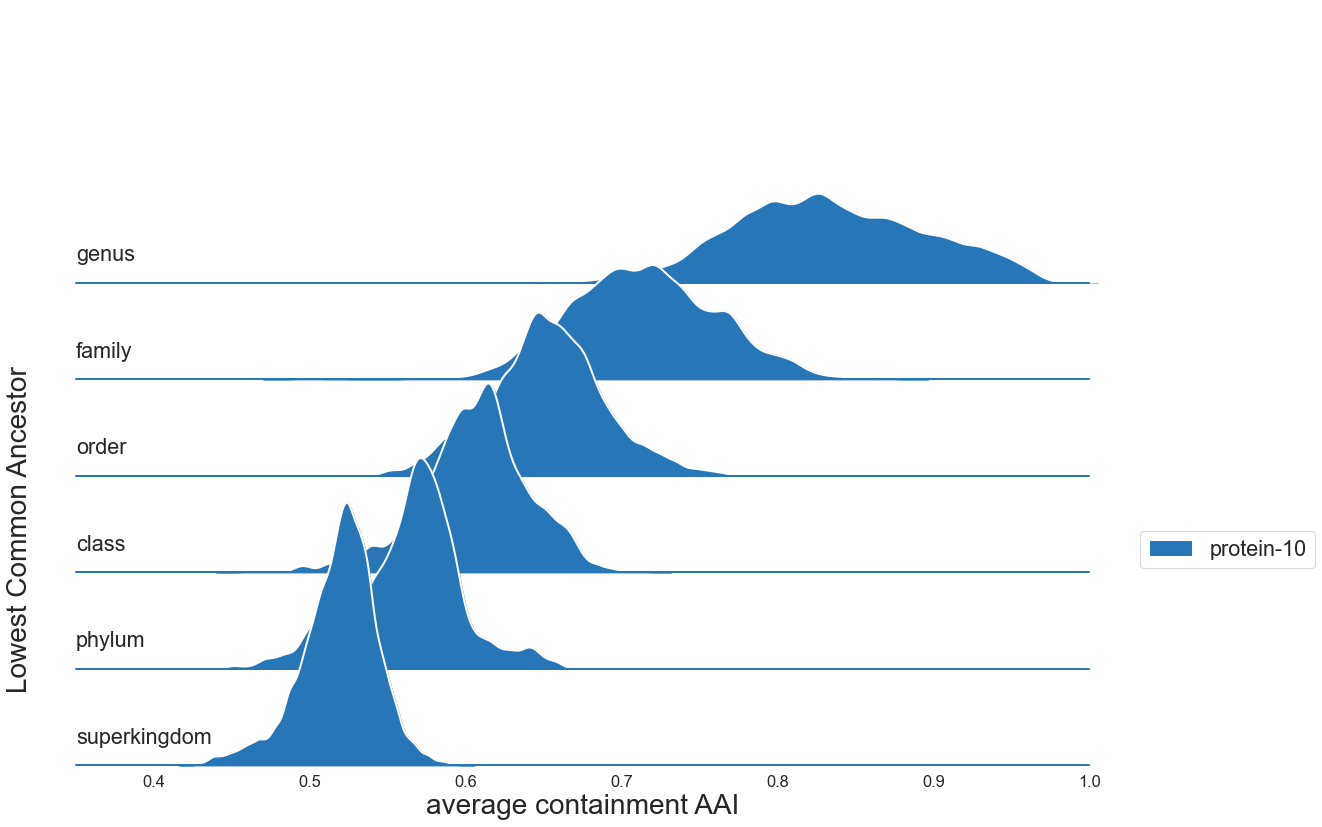

<Figure size 432x288 with 0 Axes>

In [65]:
def label(x, color, label):
        ax = plt.gca()
        lb = x.unique()[0]#.upper()
       # print(lb)
        ax.text(0, .1, lb, size="large",# fontweight="bold",# color=color,
                ha="left", va="center", transform=ax.transAxes)
#sns.set_theme(style="white",)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.5)

#with sns.plotting_context("paper", font_scale=2,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15, "axes.facecolor": (0, 0, 0, 0)}):
g = sns.FacetGrid(p10, row="lowest_common_rank", hue="alpha-ksize", aspect=15, height=1.2, palette=protein_colors)

g.map(sns.kdeplot, "avg_containment_ani", bw_adjust=.6, cut=5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "avg_containment_ani", bw_adjust=.6, cut=5, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
plt.gcf().set_size_inches(15, 12) 

    
g.map(label, "lowest_common_rank")
# make overlapping
g.fig.subplots_adjust(hspace=-.65)
# remove axis details that don't work well with overlapping plots
g.set(yticks=[], xlabel="", ylabel="", xlim=(0.35, 1), ylim=(None, None), title="")#, fontsize =10)
g.despine(bottom=True, left=True)

# create a legend
handles=[]
for ak, color in protein_colors.items():
    if ak in p10["alpha-ksize"].unique():
        handles.append(mpatches.Patch(facecolor=color, label=ak))
lgd = plt.legend(handles=handles, bbox_to_anchor=(1.05, .85), loc=2, borderaxespad=0., facecolor="white", fontsize="large")
txt= g.fig.text(-0.02, 0.35, 'Lowest Common Ancestor', va='center', rotation='vertical', size=28)
plt.xlabel("average containment AAI", size=28)
    #plt.ylabel("Lowest Common Ancestor", size=28)
plt.show()
plt.tight_layout()
g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContainAAI.k10.ridgeplot.pdf", bbox_extra_artists=(lgd,txt), bbox_inches='tight')
g.fig.savefig("gtdb-rs202.evolpaths.alphacompare.avgContainANI.k10ridgeplot.png", bbox_extra_artists=(lgd,txt), bbox_inches='tight')